In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/bank_oversample_new.csv')
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,result
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [3]:
df.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,result
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,41.408250,1474.023500,15.553750,388.201625,2.43375,49.347750,0.662625,0.128125,0.021000,0.014000,...,0.070000,0.007625,0.192250,0.050875,0.011750,0.007250,0.027875,0.043625,0.703250,0.500000
std,10.772306,2723.892551,7.663596,345.412893,2.60225,102.116466,1.654659,0.334250,0.143393,0.117498,...,0.255163,0.086993,0.394093,0.219756,0.107765,0.084843,0.164625,0.204272,0.456854,0.500031
min,19.000000,-3313.000000,1.000000,4.000000,1.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,102.000000,9.000000,147.000000,1.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,558.000000,16.000000,271.000000,2.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,48.000000,1790.000000,21.000000,530.250000,3.00000,51.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.00000,871.000000,25.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [10]:
np.random.seed(1001)
# Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5600, 42) (2400, 42) (5600,) (2400,)


In [13]:
from sklearn.ensemble import AdaBoostClassifier
#Decision Tree
from sklearn.tree import DecisionTreeClassifier # Classification tree
from sklearn.tree import export_graphviz # Visualising Tree
import warnings
warnings.filterwarnings('ignore')

In [42]:
model_ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=50, learning_rate = 1)

In [43]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

In [44]:
y_pred = model_ada.predict(X_test)
y_prob = model_ada.predict_proba(X_test)

In [45]:
import innomatics

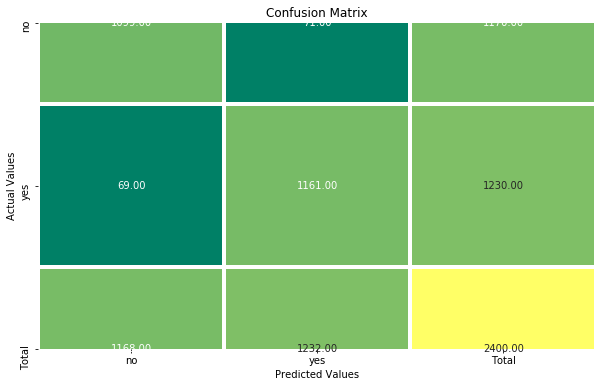

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1170
           1       0.94      0.94      0.94      1230

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400


************************************Kappa Score************************************


Kappa Score = 0.8832555036691128

******************************Area Under Curve Score******************************


AUC Score = 0.9416093391703148
Number of probabilities to build ROC = 248


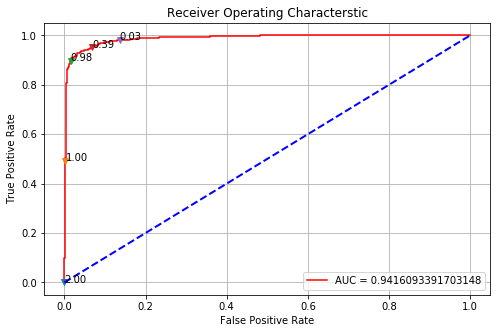

In [46]:
innomatics.classification_metric(y_test, y_pred, y_prob[:, 1], label=['no', 'yes'],
                                 n = 50, verbose = True)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
model_grad = GradientBoostingClassifier(n_estimators=500, max_depth=10, learning_rate = 0.8)

In [60]:
model_grad.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.8, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [61]:
y_pred = model_grad.predict(X_test)
y_prob = model_grad.predict_proba(X_test)

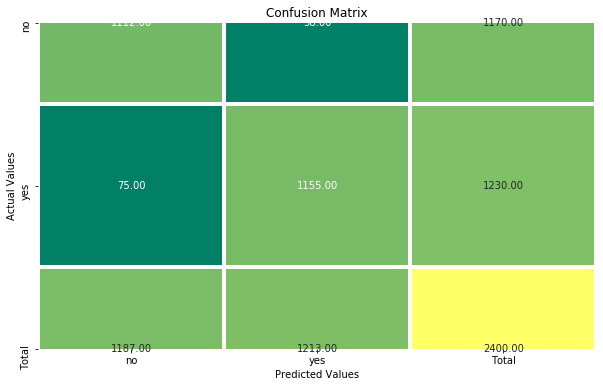

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1170
           1       0.95      0.94      0.95      1230

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400


************************************Kappa Score************************************


Kappa Score = 0.8891366411736512

******************************Area Under Curve Score******************************


AUC Score = 0.9447258703356264
Number of probabilities to build ROC = 339


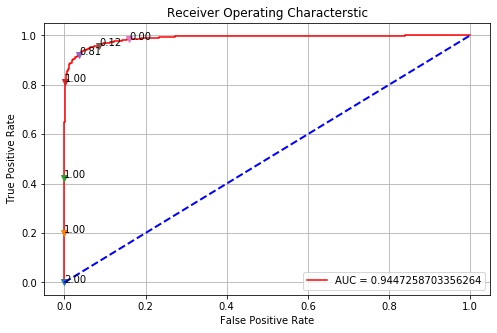

In [62]:
innomatics.classification_metric(y_test, y_pred, y_prob[:,1], label=['no', 'yes'],
                                 n = 50, verbose = True)